# Flight price prediction

The data for this project is available [here](https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/tree/main/Flight%20Prediction).

## Contents
1. [Importing required libraries](#Importing-required-libraries)
2. [Feature Engineering](#Feature-Engineering)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
>3.1. [Plotting the top 5 most frequent Airlines](#Plotting-the-top-5-most-frequent-Airlines)
><br>3.2. [Plotting the five most frequent Source cities](#Plotting-the-five-most-frequent-Source-cities)
><br>3.3. [Plotting the Frequency Chart for Destination Cities](#Plotting-the-Frequency-Chart-for-Destination-Cities)
><br>3.4. [Plotting the Frequency Chart 10 most frequent Routes](#Plotting-the-Frequency-Chart-10-most-frequent-Routes)
><br>3.5. [Plotting the frequency chart of each number of stops for the flights](#Plotting-the-frequency-chart-of-each-number-of-stops-for-the-flights)
><br>3.6. [Plotting the frequency chart for each value of Additional_Info](#Plotting-the-frequency-chart-for-each-value-of-Additional_Info)
><br>3.7. [Plotting the frequency chart for each day of departure](#Plotting-the-frequency-chart-for-each-day-of-departure)
><br>3.8. [Plotting the frequency chart for Months of departure](#Plotting-the-frequency-chart-for-Months-of-departure)
><br>3.9. [Plotting the frequency chart for Arrival Hours](#Plotting-the-frequency-chart-for-Arrival-Hours)
><br>3.10. [Plotting the frequency chart for Arrival Minutes](#Plotting-the-frequency-chart-for-Arrival-Minutes)
><br>3.11. [Plotting the frequency chart for Departure Hours](#Plotting-the-frequency-chart-for-Departure-Hours)
><br>3.12. [Plotting the frequency chart for Departure Minutes](#Plotting-the-frequency-chart-for-Departure-Minutes)
><br>3.13. [Flights with longest duration](#Flights-with-longest-duration)
><br>3.14. [Flights with Shortest Duration](#Flights-with-Shortest-Duration)
><br>3.15. [Cheapest flight](#Cheapest-flight)
><br>3.16. [Costliest flight](#Costliest-flight)
><br>3.17. [Top 10 expensive flights](#Top-10-expensive-flights)
><br>3.18. [Top 10 cheapest flights](#Top-10-cheapest-flights)
4. [Data Preprocessing](#Data-Preprocessing)
>4.1. [Label encoding the categorical columns](#Label-encoding-the-categorical-columns)
><br>4.2. [Saving the processed data into separate training and test dataset](#Saving-the-processed-data-into-separate-training-and-test-dataset)
><br>4.3. [Scaling the features](#Scaling-the-features)
5. [Splitting the data into training and validation dataset](#Splitting-the-data-into-training-and-validation-dataset)
6. [Training the model](#Training-the-model)
>6.1. [Comparing the feature importance](#Comparing-the-feature-importance)
><br> 6.2. [Excluding the features with the least importance to see if that improves the accuracy score](#Excluding-the-features-with-the-least-importance-to-see-if-that-improves-the-accuracy-score)
7. [References](#References)

### Importing required libraries

In [1]:
# imorting basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import joblib
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

Loading the data

In [2]:
train_df= pd.read_excel('Data_Train.xlsx')

In [3]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
test_df= pd.read_excel('Test_set.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


Combining the train and test data into a single dataframe.

In [5]:
final_df= train_df.append(test_df)
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [6]:
final_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


It can be seen that most of the features are in string data type.

### Feature Engineering

In [8]:
a=final_df['Date_of_Journey'].str

In [9]:
print(a)

In [10]:
a= a.split('/')

In [11]:
a

0       [24, 03, 2019]
1        [1, 05, 2019]
2        [9, 06, 2019]
3       [12, 05, 2019]
4       [01, 03, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 13354, dtype: object

In [12]:
type(a)

pandas.core.series.Series

In [13]:
a= a.str

In [14]:
type(a)

pandas.core.strings.accessor.StringMethods

In [15]:
a

In [16]:
a[1]

0       03
1       05
2       06
3       05
4       03
        ..
2666    06
2667    03
2668    03
2669    03
2670    06
Name: Date_of_Journey, Length: 13354, dtype: object

Splitting the **Date_of_Journey** column into **Day**, **Month**, **Year** separately. 

In [17]:
final_df['Date_of_Journey'].str.split('/').str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [18]:
# feature engineering
final_df['Date']= final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']= final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']= final_df['Date_of_Journey'].str.split('/').str[2]

In [19]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


Casting those features as int datatype.

In [20]:
final_df['Date']= final_df['Date'].astype(int)
final_df['Month']= final_df['Month'].astype(int)
final_df['Year']= final_df['Year'].astype(int)

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


Since the split columns provide the information required, the 'Date_of_Journey' columns becomes redundant. Hence, it is dropped from the dataframe. 

In [22]:
final_df.drop('Date_of_Journey', axis=1, inplace=True)

In [23]:
final_df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,5,2019


The Arrival_Time column also has value of the date of arrival which is not required, hence it is sliced from the time.

In [24]:
final_df['Arrival_Time']= final_df['Arrival_Time'].str.split(' ').str[0]
final_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


Arrival time can be split into arriaval hour and arrival minute. 

In [25]:
final_df['Arrival Hour']= final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival Minute']= final_df['Arrival_Time'].str.split(':').str[1]

In [26]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


Arrival Hour and Arrival Minute are converted back to integer.

In [27]:
final_df['Arrival Hour']= final_df['Arrival Hour'].astype(int)
final_df['Arrival Minute']= final_df['Arrival Minute'].astype(int)

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival Hour     13354 non-null  int32  
 14  Arrival Minute   13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


Since the column Arrival_Time has become redundant, it is dropped from the dataframe.

In [29]:
final_df.drop('Arrival_Time', axis=1, inplace=True)

In [30]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


The **Dep_Time** column is split into **Departure Hour** and **Departure Minute**.

In [31]:
final_df['Departure Hour']= final_df['Dep_Time'].str.split(':').str[0]
final_df['Departure Minute']= final_df['Dep_Time'].str.split(':').str[1]

In [32]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [33]:
final_df['Departure Hour']= final_df['Departure Hour'].astype(int)
final_df['Departure Minute']= final_df['Departure Minute'].astype(int)

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Dep_Time          13354 non-null  object 
 5   Duration          13354 non-null  object 
 6   Total_Stops       13353 non-null  object 
 7   Additional_Info   13354 non-null  object 
 8   Price             10683 non-null  float64
 9   Date              13354 non-null  int32  
 10  Month             13354 non-null  int32  
 11  Year              13354 non-null  int32  
 12  Arrival Hour      13354 non-null  int32  
 13  Arrival Minute    13354 non-null  int32  
 14  Departure Hour    13354 non-null  int32  
 15  Departure Minute  13354 non-null  int32  
dtypes: float64(1), int32(7), object(8)
memory

In [35]:
final_df.drop('Dep_Time', axis=1, inplace=True)

In [36]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


Checking for missing values in the data.

In [37]:
final_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  1
Duration               0
Total_Stops            1
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Arrival Hour           0
Arrival Minute         0
Departure Hour         0
Departure Minute       0
dtype: int64

The missing values in Price column are from test dataset.

In [38]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

**Encoding** the values with corresponding number of stops.

In [39]:
final_df['Total_Stops']= final_df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [40]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [41]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


Assuming that there will be two stops between Delhi and Cochin and filling it in the missing place.

In [42]:
final_df['Total_Stops'].fillna(2, axis=0, inplace=True)

In [43]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute


In [44]:
final_df['Total_Stops'].isnull().sum()

0

In [45]:
(final_df['Duration'].str.split(' ').str[0].str[:-1].astype(int))*60 

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: Duration, Length: 13354, dtype: int32

In [46]:
final_df['Duration'].str.split(' ').str[1].str[:-1]

0        50
1        25
2       NaN
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration, Length: 13354, dtype: object

It can be seen that there are null values in the minute column in the third row. It is checked below for other rows where it has occured.

In [47]:
final_df[final_df['Duration'].str.split(' ').str[1].str[:-1].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h,2.0,No info,13381.0,12,6,2019,19,15,20,15
33,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,22h,2.0,In-flight meal not included,10919.0,15,6,2019,12,35,14,35
44,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h,1.0,No info,13062.0,21,3,2019,21,0,9,0
53,IndiGo,Banglore,Delhi,BLR → DEL,3h,0.0,No info,3943.0,18,6,2019,0,15,21,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,Jet Airways,Delhi,Cochin,DEL → BOM → COK,11h,1.0,No info,NaN,9,6,2019,19,0,8,0
2604,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,10h,1.0,No info,NaN,12,6,2019,19,15,9,15
2607,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1.0,No info,NaN,3,3,2019,21,0,8,0
2622,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0.0,In-flight meal not included,NaN,3,5,2019,20,45,17,45


There is a value of 5 minutes for duration in a row.

These two rows are dropped as it is not possible for duration to be so small.

In [48]:
final_df[final_df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,NaN,12,3,2019,16,55,16,50


In [49]:
final_df.drop(final_df[final_df['Duration']=='5m'].index, inplace=True)

In [50]:
final_df[final_df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute


**Duration** column is split into **Duration Hr** and **Duration Min** columns.

In [51]:
final_df['Duration Hr']=final_df['Duration'].str.split(' ').str[0].str[:-1].astype(int)

In [52]:
final_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15


In [53]:
final_df['Duration Min']=final_df['Duration'].str.split(' ').str[1].str[:-1]

In [54]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


Filling the missing value for Duration Minute with 0. 

In [55]:
final_df['Duration Min'].fillna(0, inplace=True)

In [56]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [57]:
final_df['Duration Min'].isnull().sum()

0

Casting the Duration Minute column into int datatype.

In [58]:
final_df['Duration Min']=final_df['Duration Min'].astype(int)

In [59]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13351 non-null  object 
 1   Source            13351 non-null  object 
 2   Destination       13351 non-null  object 
 3   Route             13350 non-null  object 
 4   Duration          13351 non-null  object 
 5   Total_Stops       13351 non-null  float64
 6   Additional_Info   13351 non-null  object 
 7   Price             10681 non-null  float64
 8   Date              13351 non-null  int32  
 9   Month             13351 non-null  int32  
 10  Year              13351 non-null  int32  
 11  Arrival Hour      13351 non-null  int32  
 12  Arrival Minute    13351 non-null  int32  
 13  Departure Hour    13351 non-null  int32  
 14  Departure Minute  13351 non-null  int32  
 15  Duration Hr       13351 non-null  int32  
 16  Duration Min      13351 non-null  int32  

The complete duration of the flight will be expressed in minutes only.

In [60]:
final_df['Duration Min']= (final_df['Duration Hr']*60) +final_df['Duration Min']

In [61]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,285


In [62]:
final_df.drop(['Duration', 'Duration Hr'], axis=1, inplace=True)

In [63]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302.0,1,3,2019,21,35,16,50,285


In [64]:
final_df.describe()

,Total_Stops,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
count,13351.000000,10681.000000,13351.000000,13351.000000,13351.0,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000
mean,0.825856,9085.898979,13.390607,4.710733,2019.0,13.395776,24.658827,12.512995,24.502659,642.445135
std,0.674529,4610.921950,8.439749,1.165511,0.0,6.896836,16.557178,5.736678,18.831696,506.641268
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,75.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,175.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,520.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,930.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000


In [65]:
categorical_cols= final_df.select_dtypes(include=object).columns.tolist()

In [66]:
print(categorical_cols)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


Removing the Route column.

In [67]:
categorical_cols.remove('Route')

In [68]:
numerical_columns= final_df.select_dtypes(include=np.number).columns.tolist()

In [69]:
print(numerical_columns)

['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival Hour', 'Arrival Minute', 'Departure Hour', 'Departure Minute', 'Duration Min']


In [70]:
numerical_columns.remove('Price')

## Exploratory Data Analysis

Getting the names of the different Airline companies.

In [71]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [72]:
airline_names= final_df['Airline'].unique().tolist()
print(airline_names)

['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet']


The count of each Airline in the data.

In [73]:
final_df['Airline'].value_counts().values

array([4745, 2564, 2190, 1543, 1026,  608,  405,  240,   16,    8,    5,
          1], dtype=int64)

In [74]:
airline_values= final_df['Airline'].value_counts().values
airline_values

array([4745, 2564, 2190, 1543, 1026,  608,  405,  240,   16,    8,    5,
          1], dtype=int64)

### Plotting the top 5 most frequent Airlines

In [75]:
matplotlib.rcParams['figure.figsize']= (10, 10)

([<matplotlib.patches.Wedge at 0x21c648af820>,
 [Text(0.3622256294383622, 1.0386494083077227, 'IndiGo'),
  Text(-1.0999926944505556, 0.0040090092799467385, 'Air India'),
  Text(-0.36357727603796325, -1.0381770390202314, 'Jet Airways'),
  Text(0.6524339312884574, -0.8856240541581336, 'SpiceJet'),
  Text(1.0609965327467337, -0.2903211282345973, 'Multiple carriers')],
 [Text(0.19757761605728844, 0.5665360408951214, '39.32%'),
  Text(-0.5999960151548485, 0.0021867323345164023, '21.25%'),
  Text(-0.19831487783888901, -0.5662783849201262, '18.15%'),
  Text(0.35587305343006764, -0.48306766590443645, '12.79%'),
  Text(0.5787253814982183, -0.15835697903705306, '8.50%')])

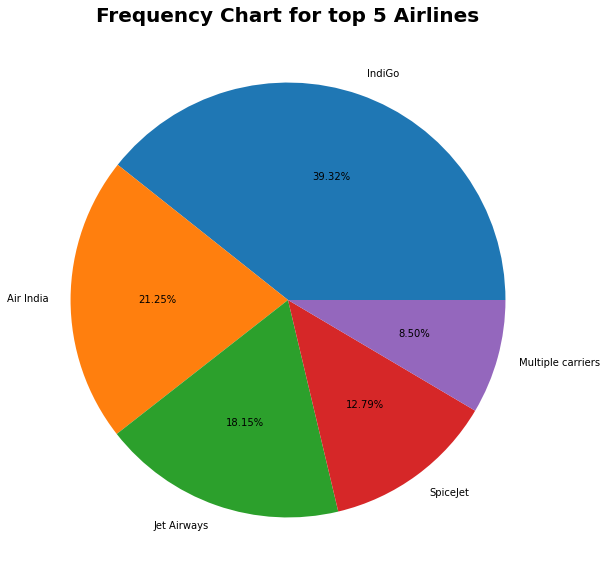

In [76]:
ply.title("Frequency Chart for top 5 Airlines", fontweight = 'bold', fontsize = '20')
ply.pie(x=airline_values[:5], labels=airline_names[:5], autopct='%.2f%%')

**Observation**
>The Airline appearing most of the times is IndiGo followed by Air India, Jet Airways, SpiceJet, Multiple carriers.

Getting the names of the different Source Cities.

In [77]:
final_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

### Plotting the five most frequent Source cities

[Text(0.5, 1.0, 'Frequency Chart for Source Cities'),
 Text(0.5, 0, 'Source Cities'),
 Text(0, 0.5, 'Count')]

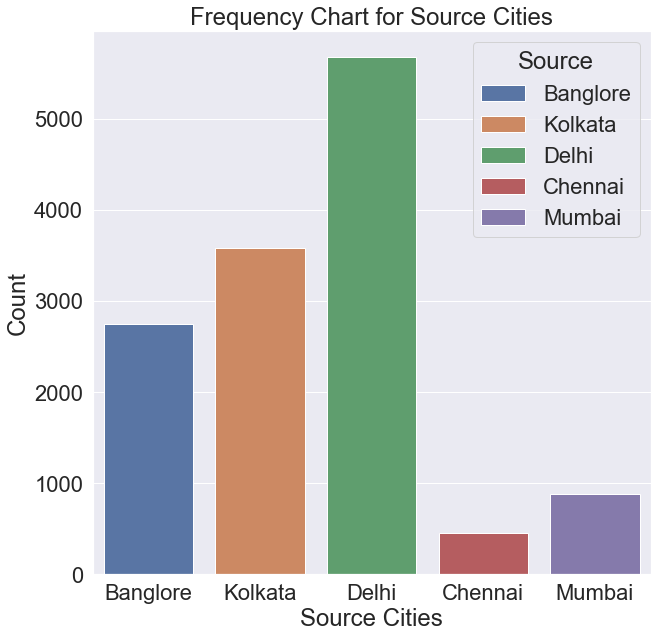

In [78]:
sns.set(font_scale=2)
# sns.barplot(data=final_df, x= final_df['Source'].value_counts().index, y=final_df['Source'].value_counts().values).set(title='Frequency Chart for Source Cities', xlabel='Source Cities', ylabel='Count')
sns.countplot(x='Source',hue='Source',data=final_df,dodge=False).set(title='Frequency Chart for Source Cities', xlabel='Source Cities', ylabel='Count')

It can be observed that the source for most of the flights is **Delhi**, followed by Kolkata, Bangalore, Mumbai and **Chennai**.

Getting the names of the different Destination cities.

In [79]:
final_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

### Plotting the Frequency Chart for Destination Cities

[Text(0.5, 1.0, 'Frequency Chart for Destination Cities'),
 Text(0.5, 0, 'Destination Cities'),
 Text(0, 0.5, 'Count')]

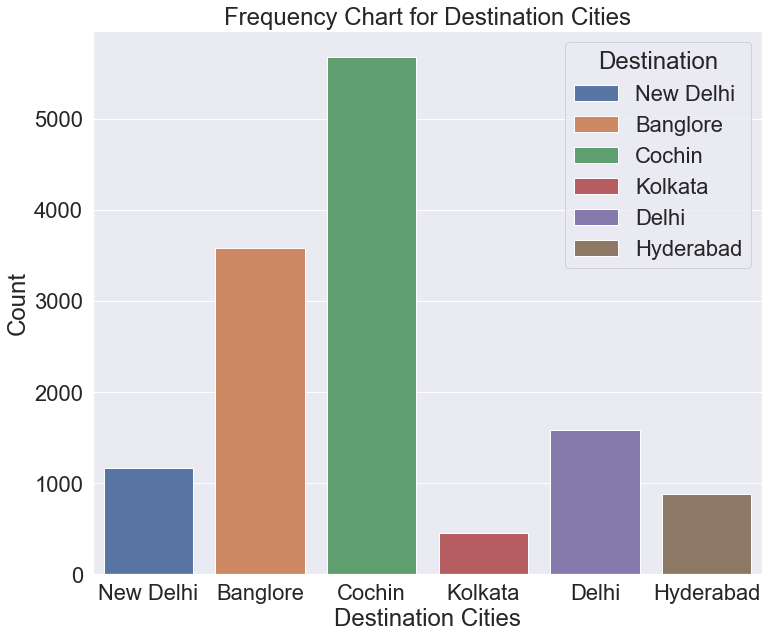

In [80]:
matplotlib.rcParams['figure.figsize']= (12, 10)
# sns.barplot(data=final_df, x= final_df['Destination'].value_counts().index, y=final_df['Destination'].value_counts().values).set(title='Frequency Chart for Destination Cities', xlabel='Destination Cities', ylabel='Count')
sns.countplot(x='Destination',hue='Destination',data=final_df,dodge=False).set(title='Frequency Chart for Destination Cities', xlabel='Destination Cities', ylabel='Count')

It can be observed that the destination for most of the flights is **Cochin**, followed by Bangalore, Delhi, New Delhi, Hyderabad and **Kolkata**.

Getting the different routes the flights travel through.

In [81]:
final_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

### Plotting the Frequency Chart 10 most frequent Routes

[Text(0.5, 1.0, 'Frequency Chart for 10 most frequent Routes'),
 Text(0.5, 0, 'Routes'),
 Text(0, 0.5, 'Count')]

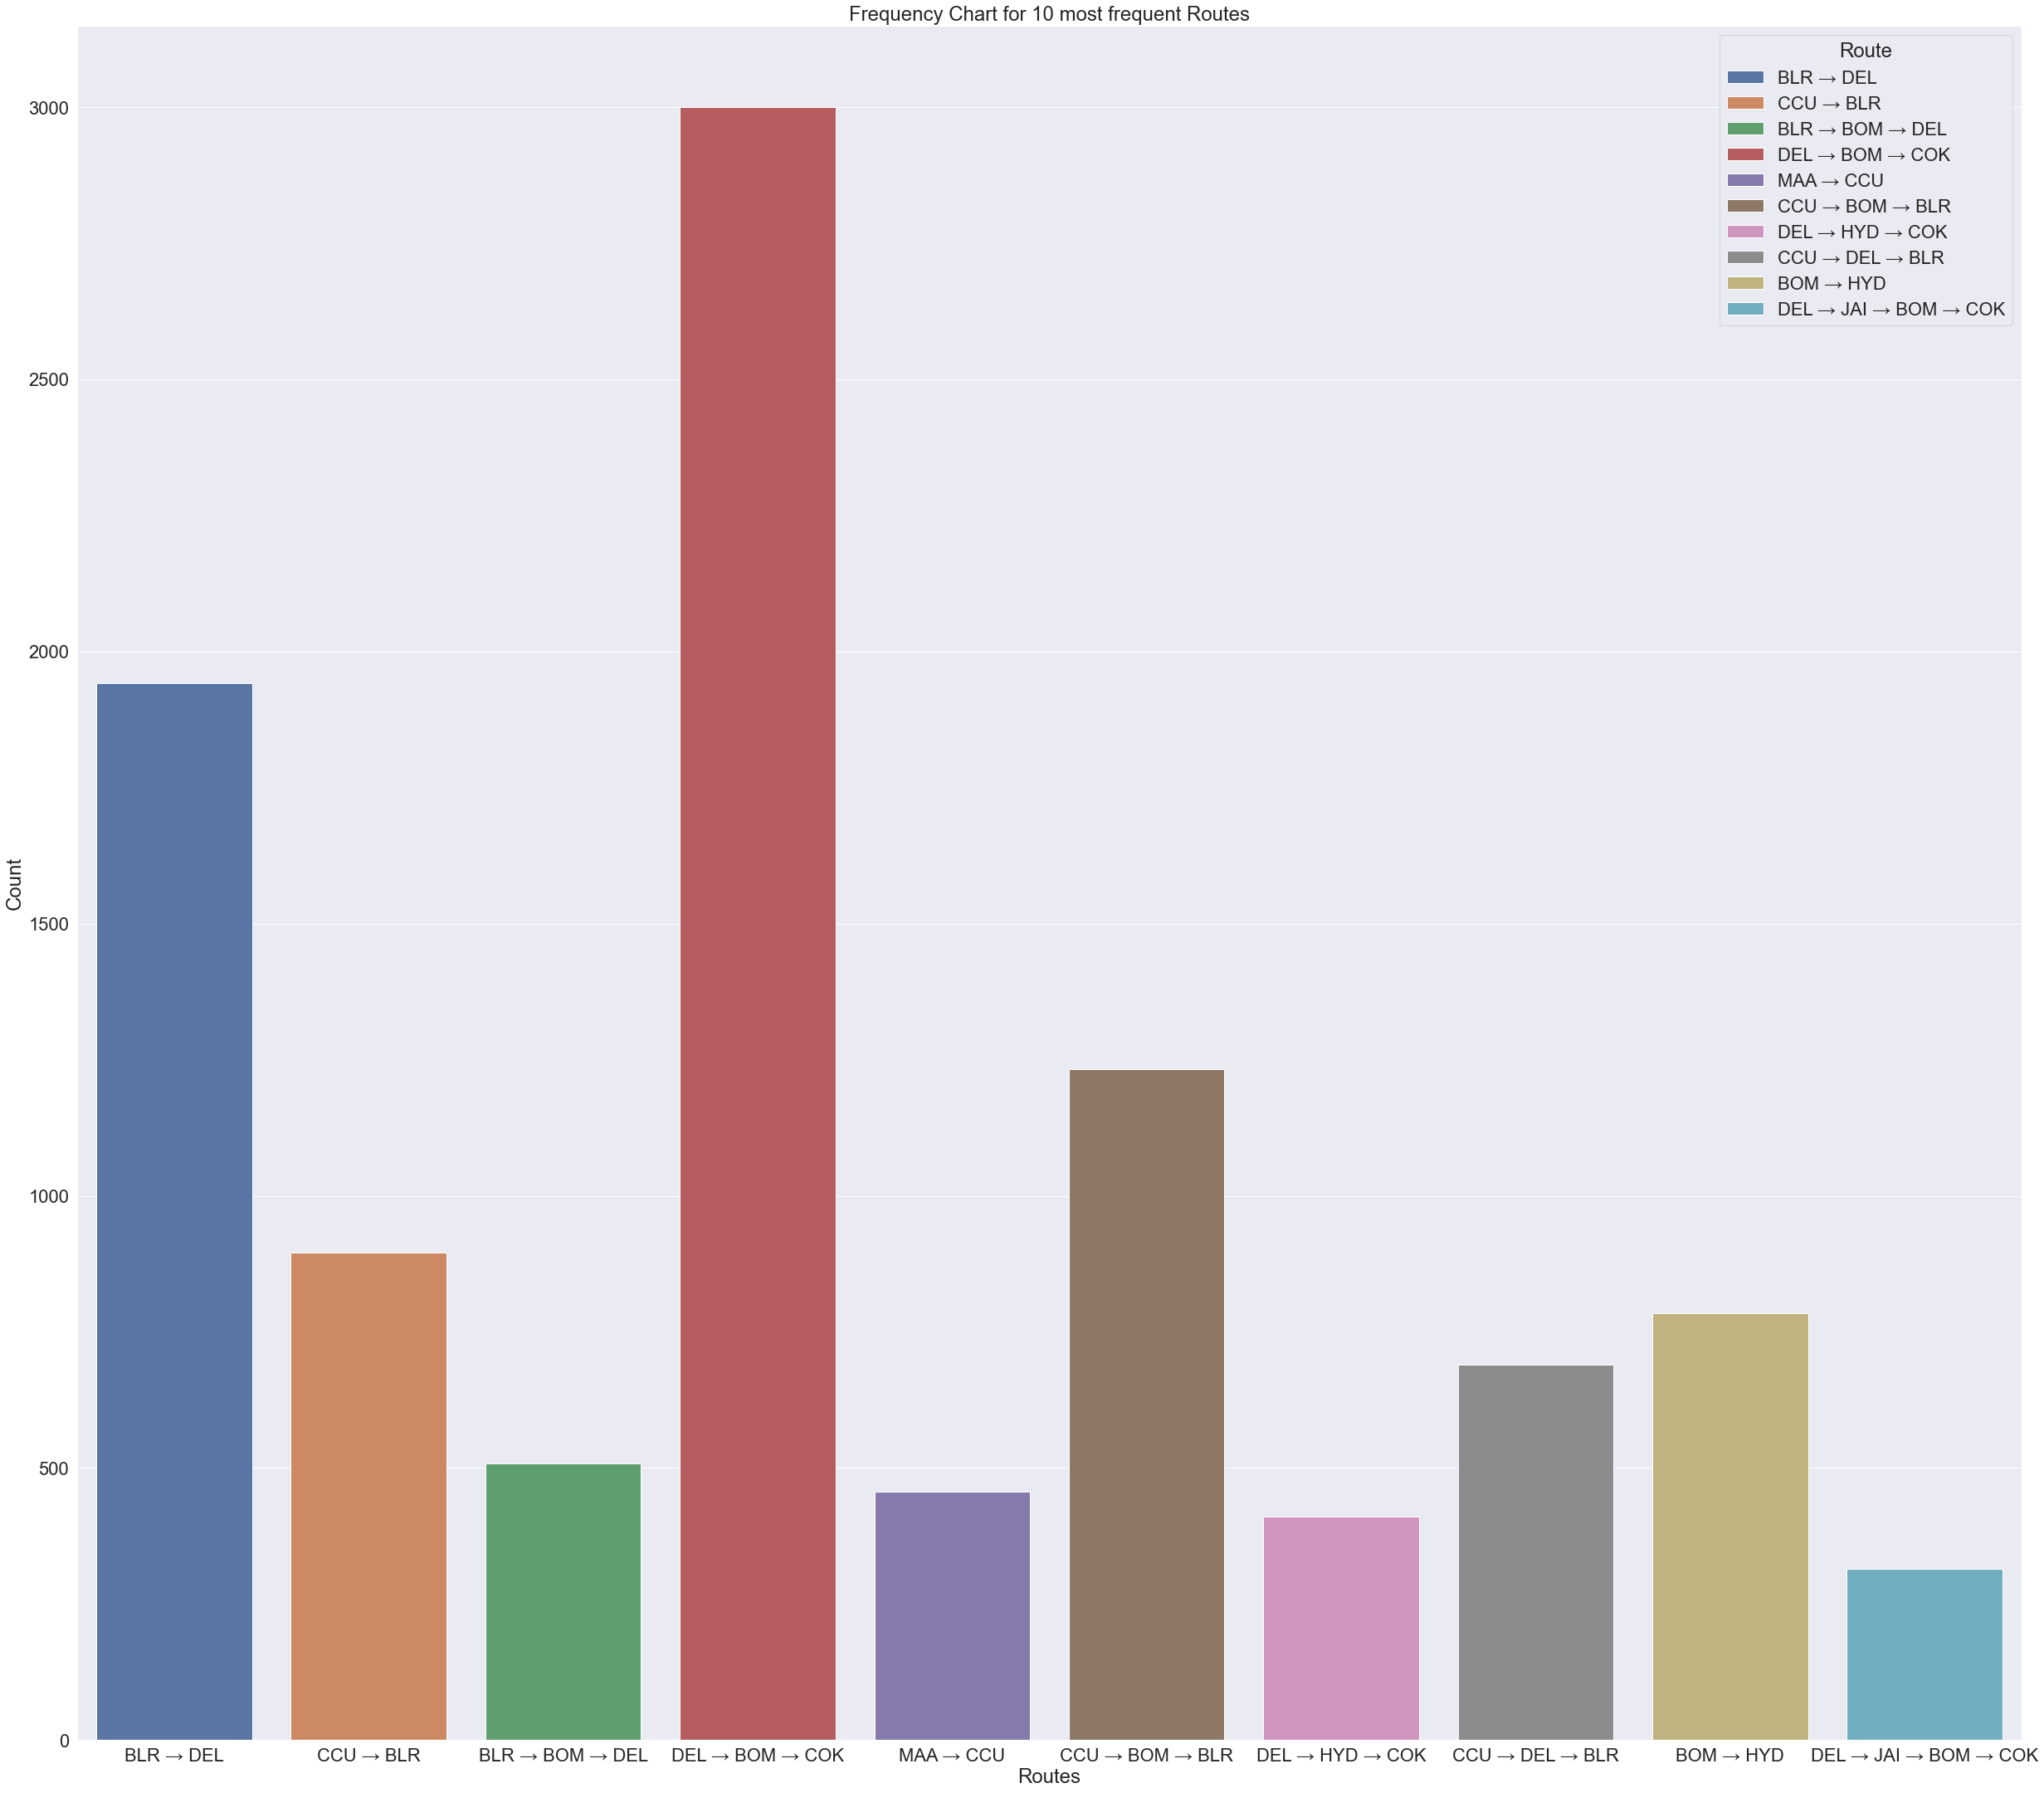

In [82]:
matplotlib.rcParams['figure.figsize']= (42, 38)
sns.countplot(x='Route',hue='Route',data=final_df[final_df['Route'].isin(final_df['Route'].value_counts().index[:10].tolist())],dodge=False).set(title='Frequency Chart for 10 most frequent Routes', xlabel='Routes', ylabel='Count')

Most travelled route is **DEL->BOM->COK** followed by BLR->DEL, CCU->BOM->BLR, CCU->BLR, BOM->HYD, CCU->DEL->BLR, BLR->BOM->DEL, MAA->CCU, DEL->HYD->COK, **DEL->JAI->BOM->COK**.

Getting the different number of stops for the flights.

In [83]:
final_df['Total_Stops'].unique()

array([0., 2., 1., 3., 4.])

### Plotting the frequency chart of each number of stops for the flights

[Text(0.5, 1.0, 'Frequency Chart for Number of Stops'),
 Text(0.5, 0, 'Number of Stops'),
 Text(0, 0.5, 'Count')]

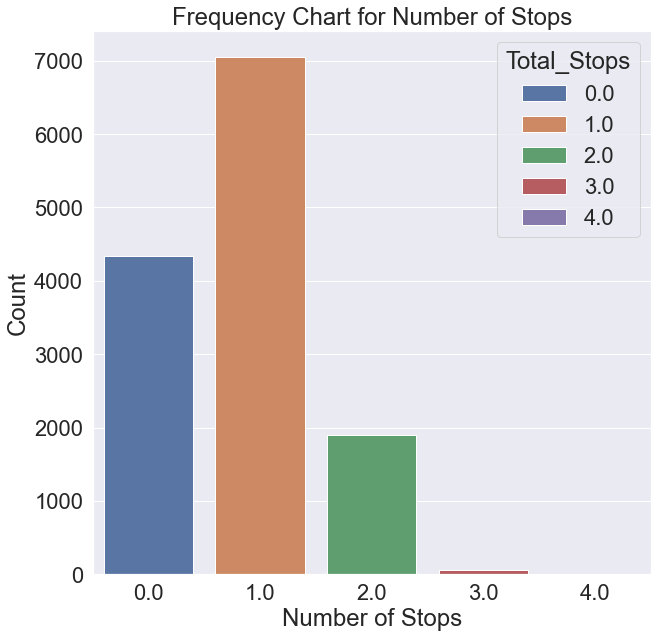

In [84]:
matplotlib.rcParams['figure.figsize']= (10, 10)
# sns.barplot(data=final_df, x= final_df['Total_Stops'].value_counts().index, y=final_df['Total_Stops'].value_counts().values).set(title='Frequency Chart for Number of Stops', xlabel='Number of Stops', ylabel='Count')
sns.countplot(x='Total_Stops',hue='Total_Stops',data=final_df,dodge=False).set(title='Frequency Chart for Number of Stops', xlabel='Number of Stops', ylabel='Count')

Most flights have **1** stop during the journey followed by 0, 2, 3, **4** stops.

Getting the unique values for Additional_Info.

In [85]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

There are two unique values for representing No information namely **'No info'** and **'No Info'**. Therefore every value of 'No info' is replaced with **'No Info'**.

In [86]:
final_df['Additional_Info'].replace(to_replace='No info', value='No Info', inplace=True)

In [87]:
final_df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

### Plotting the frequency chart for each value of Additional_Info

[Text(0.5, 1.0, 'Frequency Chart for Additional Information'),
 Text(0.5, 0, 'Additional Information'),
 Text(0, 0.5, 'Count')]

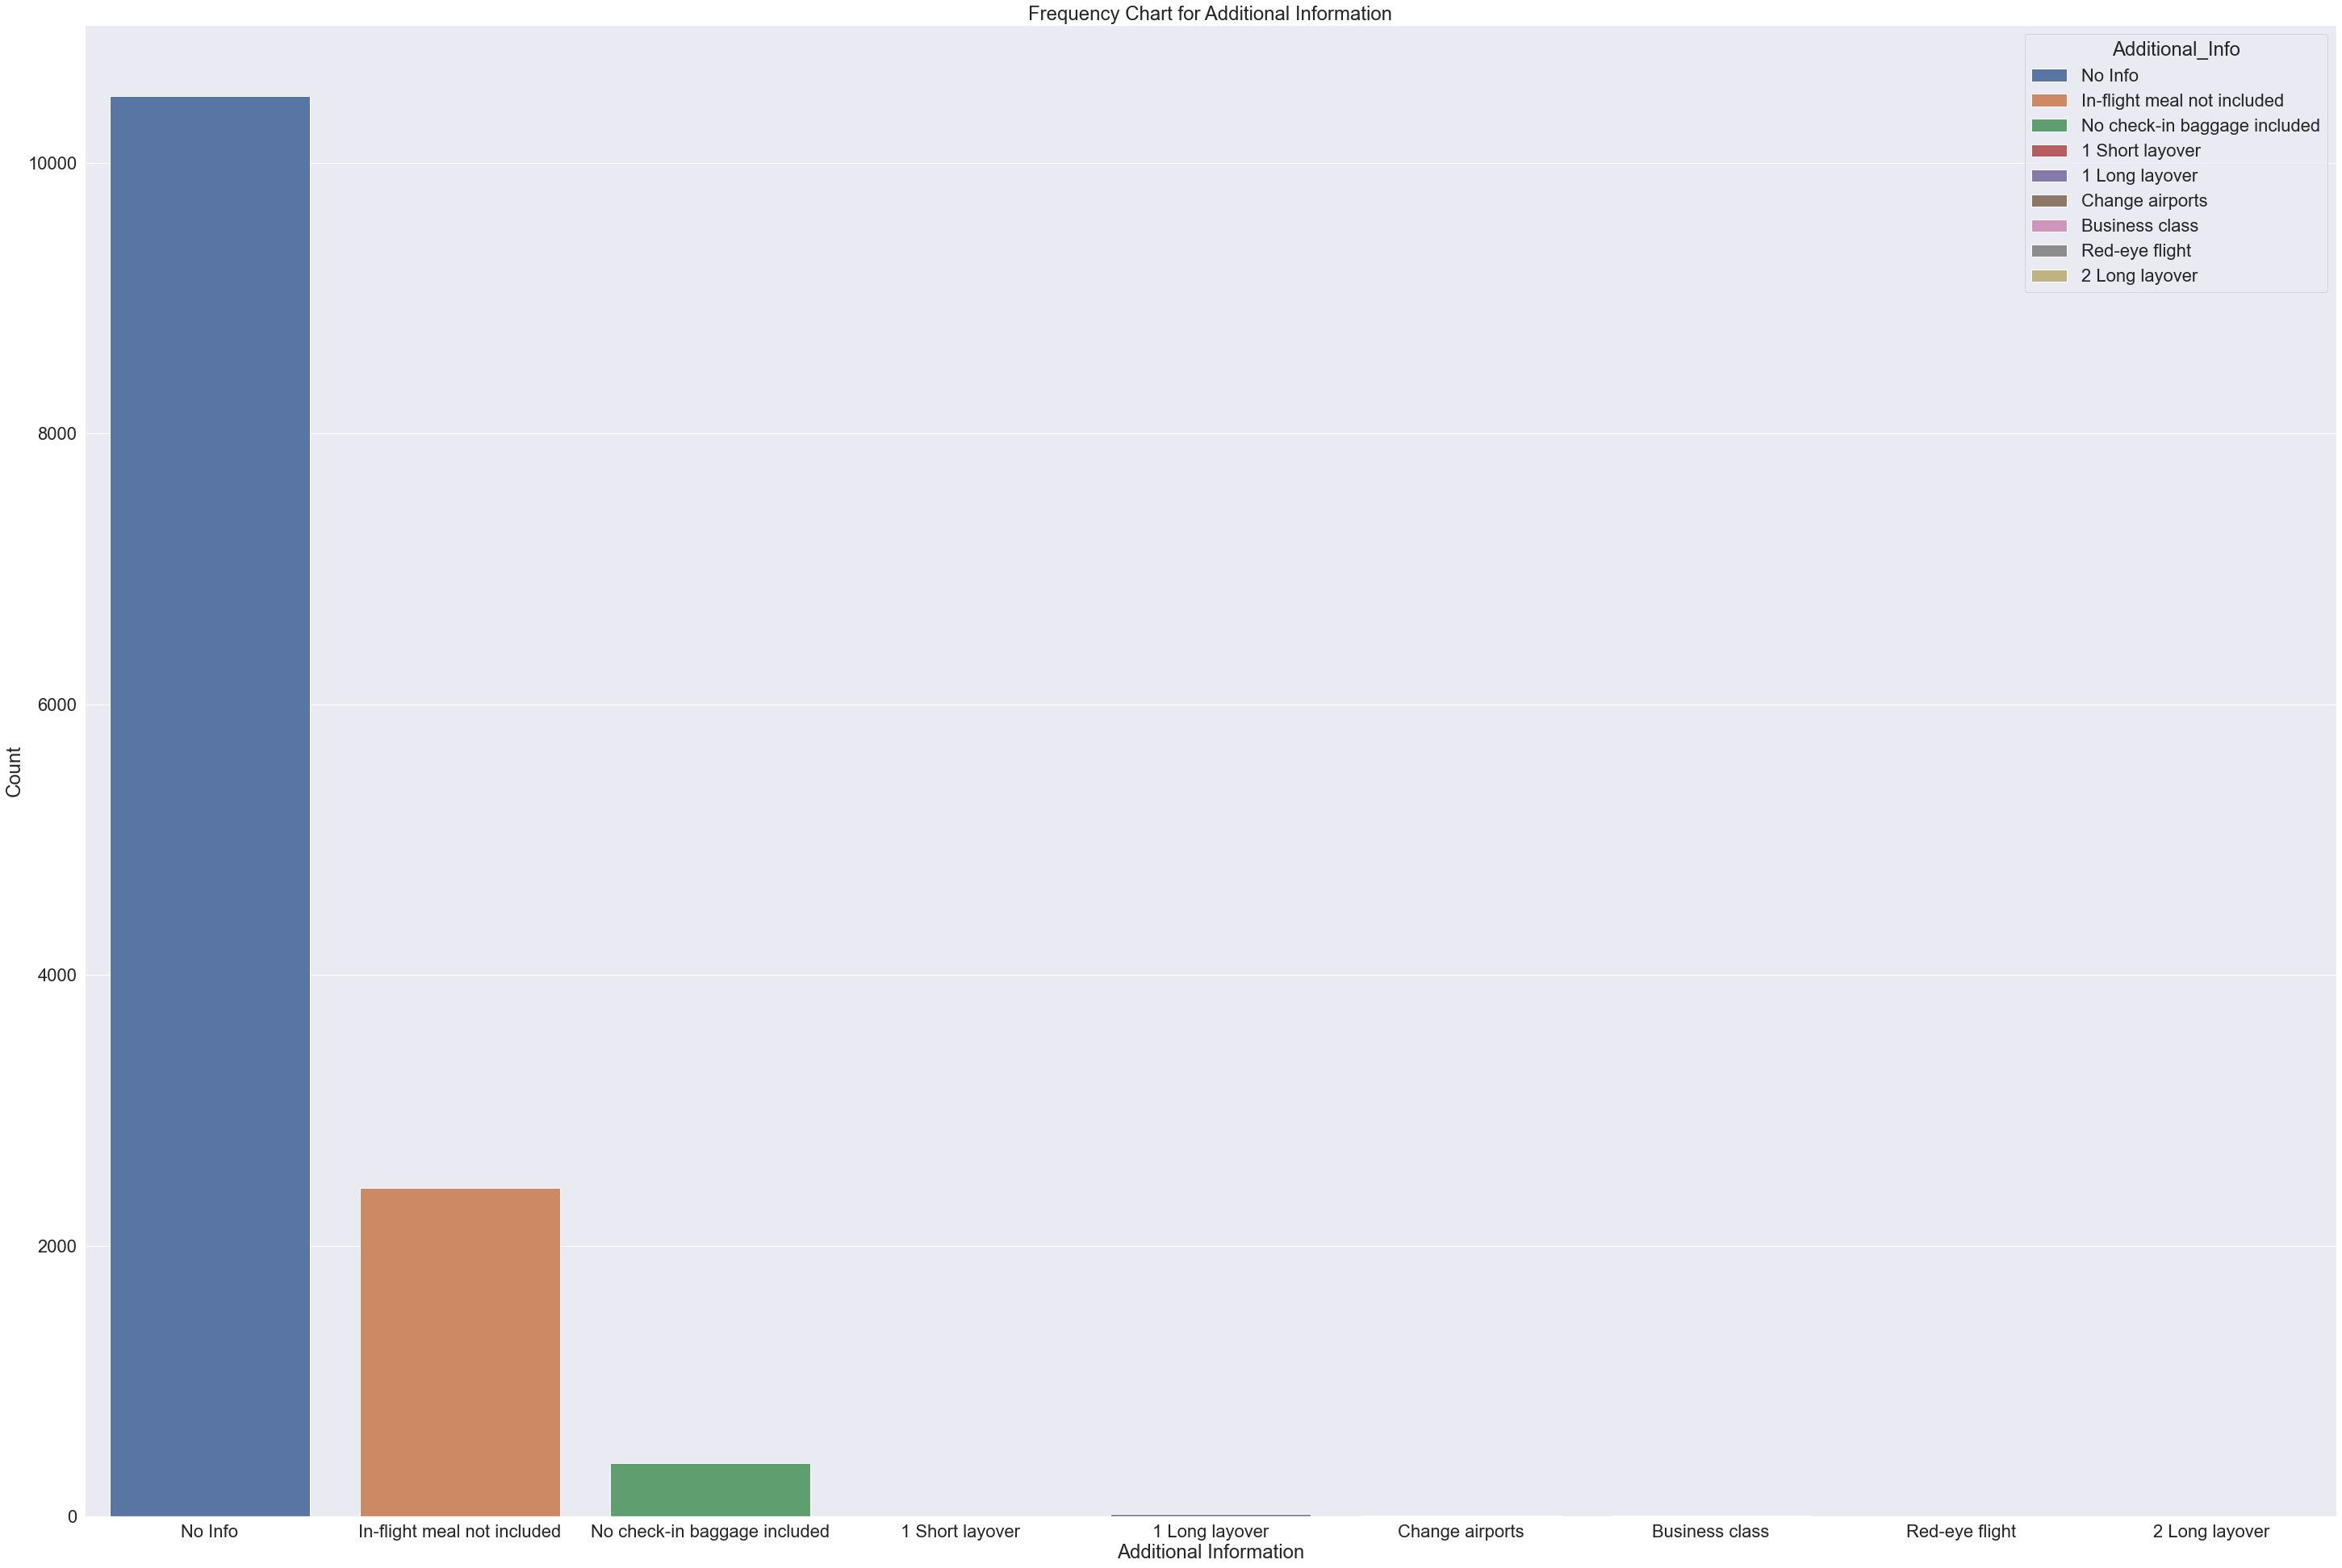

In [88]:
matplotlib.rcParams['figure.figsize']= (50, 34)
sns.countplot(x='Additional_Info',hue='Additional_Info',data=final_df,dodge=False).set(title='Frequency Chart for Additional Information', xlabel='Additional Information', ylabel='Count')

Most repeated value for Aditional Info is **'No Info'** follwed by 'In-flight meal not included', 'No check-in baggage included', '1 Long layover', 'Change airports', 'Buisness class', '1 Short layover', 'Red-eye flight' and **'2 Long layover'**.

Getting the days in which there is flight departure.

In [89]:
final_df['Date'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

### Plotting the frequency chart for each day of departure

[Text(0.5, 1.0, 'Frequency Chart for Days'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'Count')]

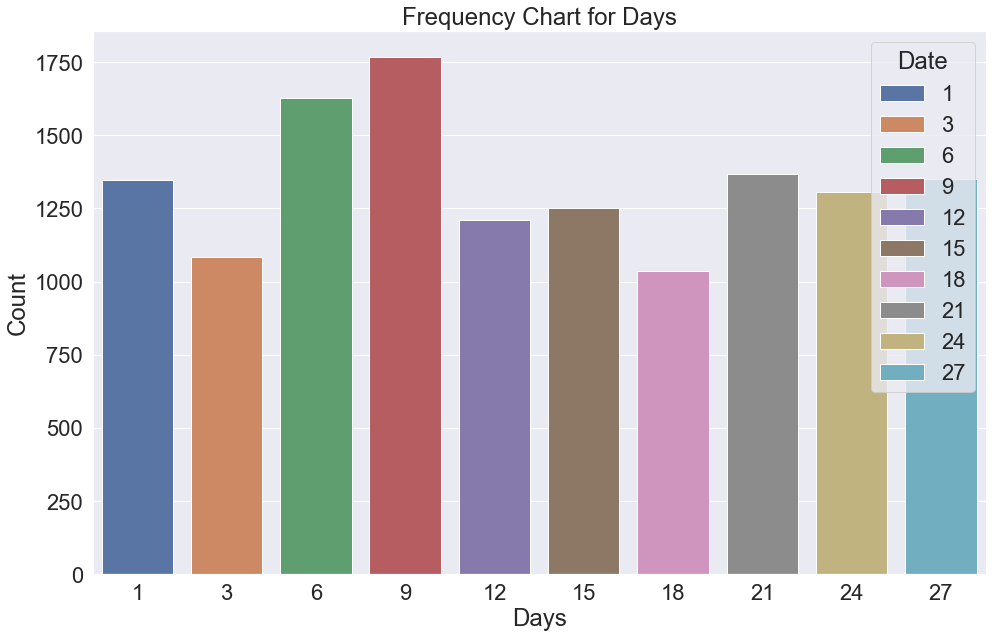

In [90]:
matplotlib.rcParams['figure.figsize']= (16, 10)
sns.countplot(x='Date',hue='Date',data=final_df,dodge=False).set(title='Frequency Chart for Days', xlabel='Days', ylabel='Count')

The **most frequent date** for the flights is **9th of every month**.<br>
The **least frequent date** for the flights is **18th of every month**. 

Getting the months for the departure of flights.

In [91]:
final_df['Month'].unique()

array([3, 5, 6, 4])

### Plotting the frequency chart for Months of departure

[Text(0.5, 1.0, 'Frequency Chart for Months'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Count')]

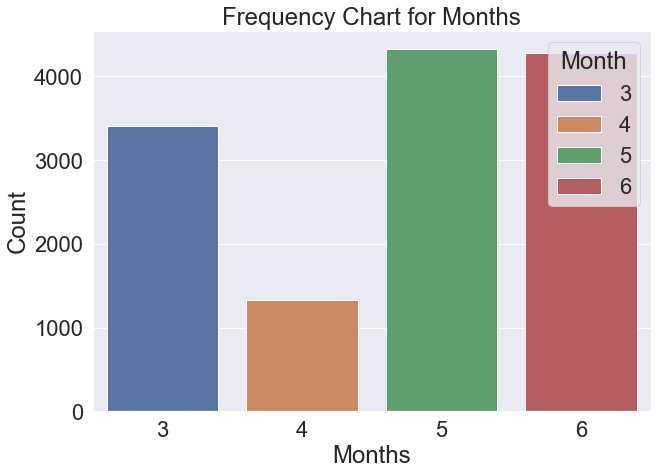

In [92]:
matplotlib.rcParams['figure.figsize']= (10, 7)
# sns.barplot(data=final_df, x= final_df['Month'].value_counts().index, y=final_df['Month'].value_counts().values).set(title='Frequency Chart for Months', xlabel='Months', ylabel='Count')
sns.countplot(x='Month',hue='Month',data=final_df,dodge=False).set(title='Frequency Chart for Months', xlabel='Months', ylabel='Count')

The **most frequent month** for the flights is **5 i.e. May** and the **least frequent month is 4 i.e. April**. 

In [93]:
final_df['Year'].unique()

array([2019])

The only year the data has is 2019. Since a constant feature would not have any effect on the target, it is removed from the numerical columns list.

In [94]:
numerical_columns.remove('Year')

In [95]:
final_df['Arrival Hour'].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17])

### Plotting the frequency chart for Arrival Hours

[Text(0.5, 1.0, 'Frequency Chart for Arrival Hours'),
 Text(0.5, 0, 'Arrival Hours'),
 Text(0, 0.5, 'Count')]

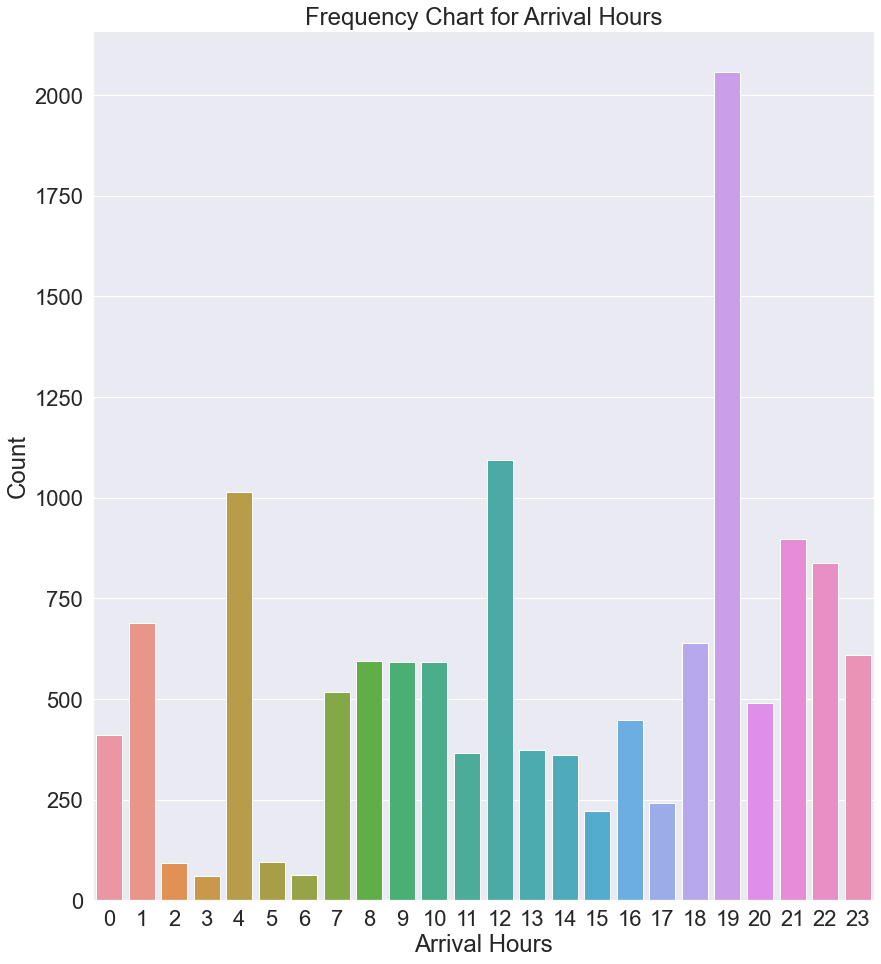

In [96]:
matplotlib.rcParams['figure.figsize']= (14, 16)
sns.countplot(x='Arrival Hour',data=final_df,dodge=False).set(title='Frequency Chart for Arrival Hours', xlabel='Arrival Hours', ylabel='Count')

**Observation**<br>
The **most frequent** arrival hour is **19 i.e. & 7PM**.
The **least frequent** arrival hour is **3AM**.

In [97]:
final_df['Arrival Minute'].unique()

array([10, 15, 25, 30, 35,  5,  0, 55, 20, 50, 45, 40])

### Plotting the frequency chart for Arrival Minutes

[Text(0.5, 1.0, 'Frequency Chart for Arrival Minute'),
 Text(0.5, 0, 'Arrival Minute'),
 Text(0, 0.5, 'Count')]

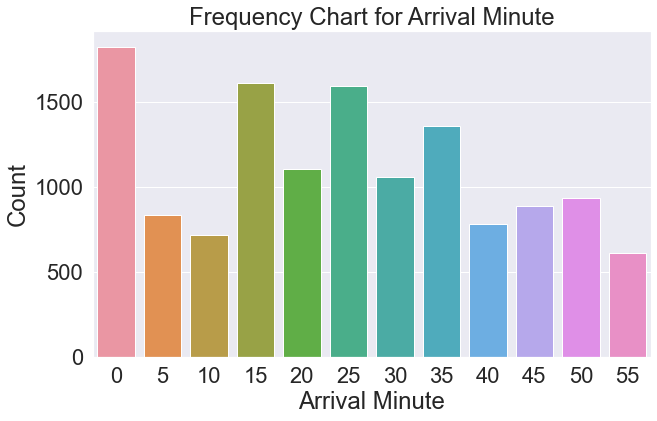

In [98]:
matplotlib.rcParams['figure.figsize']= (10, 6)
sns.countplot(x='Arrival Minute',data=final_df, dodge=False).set(title='Frequency Chart for Arrival Minute', xlabel='Arrival Minute', ylabel='Count')

**Observation**
<br>
The **most frequent** arrival minute is **0 i.e. the start of every hour**.
The **least frequent** arrival minute is the **55th minute of every hour**.

In [99]:
final_df['Departure Hour'].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3])

### Plotting the frequency chart for Departure Hours

[Text(0.5, 1.0, 'Frequency Chart for Departure Hours'),
 Text(0.5, 0, 'Departure Hours'),
 Text(0, 0.5, 'Count')]

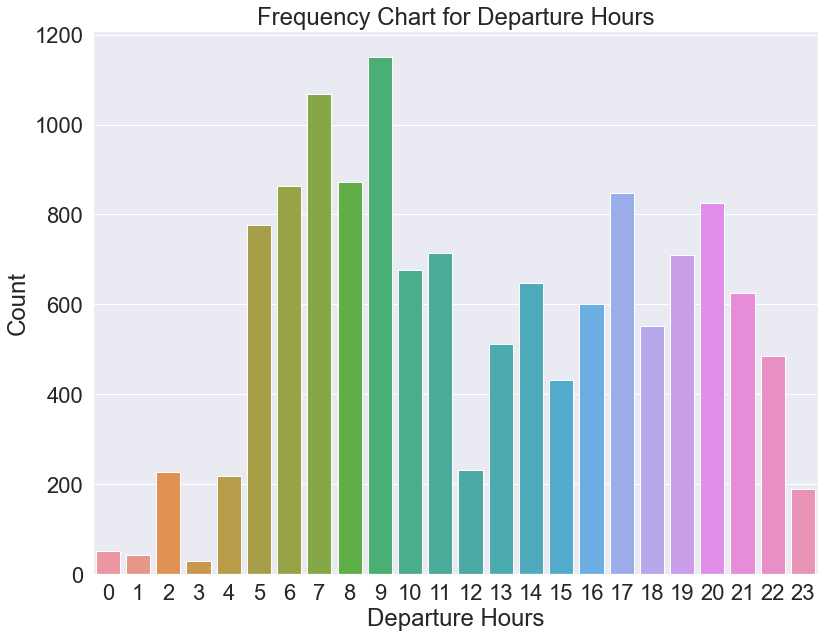

In [100]:
matplotlib.rcParams['figure.figsize']= (13, 10)
sns.countplot(x='Departure Hour',data=final_df, dodge=False).set(title='Frequency Chart for Departure Hours', xlabel='Departure Hours', ylabel='Count')

It can be seen that the **most frequent hour of departure is 9 and the least frequent hour is 3**.

### Plotting the frequency chart for Departure Minutes

[Text(0.5, 1.0, 'Frequency Chart for Departure Minutes'),
 Text(0.5, 0, 'Departure Minute'),
 Text(0, 0.5, 'Count')]

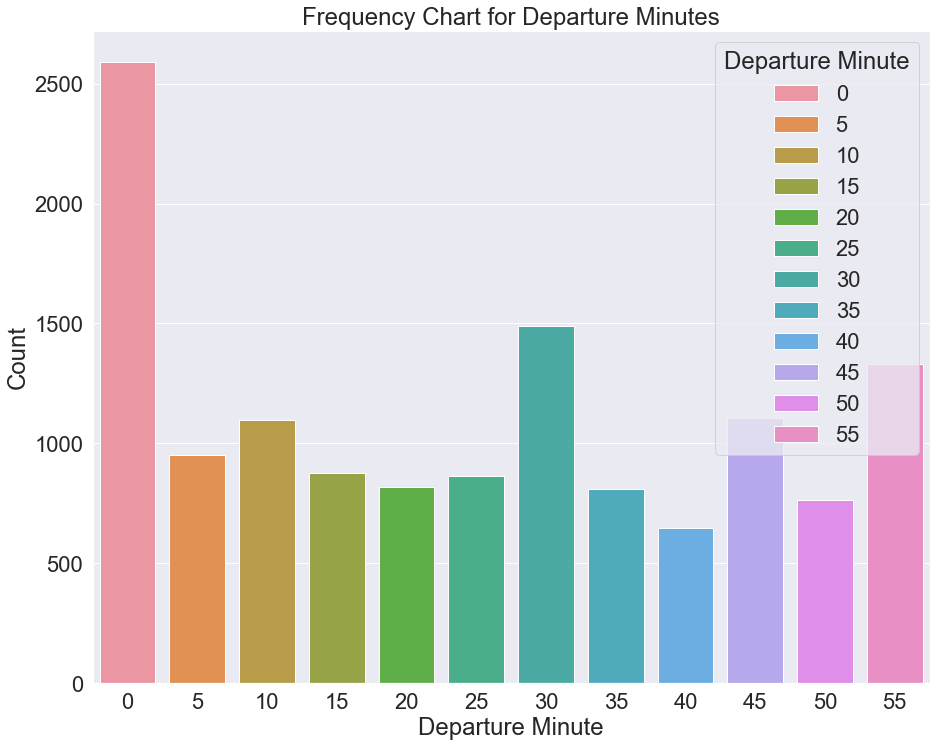

In [101]:
matplotlib.rcParams['figure.figsize']= (15, 12)
# sns.barplot(data=final_df, x= final_df['Departure Minute'].value_counts().index, y=final_df['Departure Minute'].value_counts().values).set(title='Frequency Chart for Departure Minutes', xlabel='Departure Minute', ylabel='Count')
sns.countplot(x='Departure Minute',hue='Departure Minute',data=final_df,dodge=False).set(title='Frequency Chart for Departure Minutes', xlabel='Departure Minute', ylabel='Count')

The **most frequent departure minute is 0** and the **least frequent departure minute is 40**. 

### Flights with longest duration

In [102]:
final_df['Duration Min'].max()

2860

In [103]:
final_df[final_df['Duration Min']==final_df['Duration Min'].max()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
10456,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2.0,No Info,20694.0,6,3,2019,18,50,19,10,2860


The maximum duration for a flight is **2860 minutes i.e. 1 day 23hours 40 minutes** which was owned by **Jet Airways** going from **Delhi to Cochin**, departed Delhi on **6th March 2019 at 19:10** and arrived Cochin on **8th March 2019 at 18:50** with **2 stops**, the price of which was **Rs.20694**.  

### Flights with Shortest Duration

In [104]:
final_df['Duration Min'].min()

75

In [105]:
final_df[final_df['Duration Min']==final_df['Duration Min'].min()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
844,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3625.0,24,5,2019,20,45,19,30,75
1301,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,9,5,2019,20,45,19,30,75
1322,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,5462.0,6,3,2019,20,45,19,30,75
1416,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,2050.0,18,3,2019,20,45,19,30,75
2083,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,2575.0,27,3,2019,20,45,19,30,75
2813,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,21,5,2019,20,45,19,30,75
3708,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,1,5,2019,20,45,19,30,75
3986,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,15,5,2019,20,45,19,30,75
4137,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,1,6,2019,20,45,19,30,75
4806,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,2050.0,3,4,2019,20,45,19,30,75


In [106]:
final_df[final_df['Duration Min']==final_df['Duration Min'].min()]['Airline'].unique()

array(['Air India'], dtype=object)

In [107]:
final_df[final_df['Duration Min']==final_df['Duration Min'].min()]['Route'].unique()

array(['BOM → HYD'], dtype=object)

The shortest duration for a flight is **75 minutes i.e. 1 hour 15 minutes**, which was owned by **Air India**, going from **Mumbai to Hyderabad**.

In [108]:
final_df['Price'].describe()

count    10681.000000
mean      9085.898979
std       4610.921950
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

### Cheapest flight

In [109]:
final_df[final_df['Price']==final_df['Price'].min()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,21,3,2019,0,10,22,45,85
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,27,3,2019,0,10,22,45,85
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,3,4,2019,0,15,22,45,90
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,27,3,2019,7,5,5,45,80


The cheapest flight is owned by **SpiceJet**, which goes from **Mumbai to Hyderabad** with **no stops** in the middle priced at **Rs. 1759**. 

### Costliest flight

In [110]:
final_df[final_df['Price']==final_df['Price'].max()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,Business class,79512.0,1,3,2019,11,25,5,45,340


The costliest flight is a **Business class** owned by **Jet Airways Business**, which goes from **Bangalore to New Delhi** with **one stop**, departed Bangalore on **1st March 2019 at 5:45 AM** and arrived in New Delhi on same day at **11:25 AM**, which cost **Rs. 79512**.

The average cost for a flight is Rs. 9085.

### Top 10 expensive flights

In [111]:
final_df.sort_values(by='Price', ascending=False).head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,Business class,79512.0,1,3,2019,11,25,5,45,340
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,Business class,62427.0,1,3,2019,12,25,5,45,400
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1.0,Business class,57209.0,1,3,2019,14,25,9,45,280
5439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,54826.0,1,3,2019,23,0,16,55,365
1478,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,54826.0,18,3,2019,0,45,18,40,365
2618,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,54826.0,18,3,2019,5,5,22,50,375
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2.0,No Info,52285.0,6,3,2019,4,25,20,5,500
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,52229.0,1,3,2019,10,45,5,45,300
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2.0,No Info,46490.0,3,3,2019,4,25,20,5,500
396,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1.0,No Info,36983.0,1,3,2019,19,15,12,50,385


### Top 10 cheapest flights

In [112]:
final_df.sort_values(by='Price', ascending=True).head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,3,4,2019,0,15,22,45,90
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,27,3,2019,7,5,5,45,80
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,27,3,2019,0,10,22,45,85
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,21,3,2019,0,10,22,45,85
1513,Jet Airways,Mumbai,Hyderabad,BOM → HYD,0.0,In-flight meal not included,1840.0,27,3,2019,4,25,2,55,90
2415,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,18,5,2019,0,15,22,45,90
7823,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,1,4,2019,7,15,5,45,90
7292,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,12,5,2019,7,15,5,45,90
1472,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,21,5,2019,14,45,13,15,90
1718,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,24,5,2019,7,15,5,45,90


## Data Preprocessing

### Label encoding the categorical columns

In [113]:
label_encoder= LabelEncoder()

In [114]:
final_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No Info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No Info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No Info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No Info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No Info,13302.0,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1.0,No Info,NaN,6,6,2019,20,25,20,30,1435
2667,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No Info,NaN,27,3,2019,16,55,14,20,155
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1.0,No Info,NaN,6,3,2019,4,25,21,50,395
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1.0,No Info,NaN,6,3,2019,19,15,4,0,915


In [115]:
encoders = {}
for col in categorical_cols:
    le = LabelEncoder().fit(final_df[col])
    final_df[col] = le.transform(final_df[col])
    encoders[col] = le

In [116]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,3,0,5,BLR → DEL,0.0,6,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,CCU → IXR → BBI → BLR,2.0,6,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,DEL → LKO → BOM → COK,2.0,6,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,CCU → NAG → BLR,1.0,6,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,BLR → NAG → DEL,1.0,6,13302.0,1,3,2019,21,35,16,50,285


Removing the Route column from the dataframe.

In [117]:
final_df.drop('Route', axis=1, inplace=True)

In [118]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,3,0,5,0.0,6,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2.0,6,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2.0,6,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1.0,6,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1.0,6,13302.0,1,3,2019,21,35,16,50,285


Since the column Year only has a constant value of 2019, it would not have any effect on the price. Hence it is removed. 

In [119]:
final_df.drop('Year', axis=1, inplace=True)

In [120]:
final_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,3,0,5,0.0,6,3897.0,24,3,1,10,22,20,170
1,1,3,0,2.0,6,7662.0,1,5,13,15,5,50,445
2,4,2,1,2.0,6,13882.0,9,6,4,25,9,25,1140
3,3,3,0,1.0,6,6218.0,12,5,23,30,18,5,325
4,3,0,5,1.0,6,13302.0,1,3,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,6,NaN,6,6,20,25,20,30,1435
2667,3,3,0,0.0,6,NaN,27,3,16,55,14,20,155
2668,4,2,1,1.0,6,NaN,6,3,4,25,21,50,395
2669,1,2,1,1.0,6,NaN,6,3,19,15,4,0,915


### Saving the processed data into separate training and test dataset

In [121]:
test_df= final_df[final_df['Price'].isnull()]

In [122]:
test_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,4,2,1,1.0,6,NaN,6,6,4,25,17,30,655
1,3,3,0,1.0,6,NaN,12,5,10,20,6,20,240
2,4,2,1,1.0,5,NaN,21,5,19,0,19,15,1425
3,6,2,1,1.0,6,NaN,21,5,21,0,8,0,780
4,0,0,2,0.0,6,NaN,24,6,2,45,23,55,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,6,NaN,6,6,20,25,20,30,1435
2667,3,3,0,0.0,6,NaN,27,3,16,55,14,20,155
2668,4,2,1,1.0,6,NaN,6,3,4,25,21,50,395
2669,1,2,1,1.0,6,NaN,6,3,19,15,4,0,915


Removing the Price column from the dataframe, because that is what will be predicted using the available data.

In [123]:
test_df.drop('Price', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [124]:
test_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,4,2,1,1.0,6,6,6,4,25,17,30,655
1,3,3,0,1.0,6,12,5,10,20,6,20,240
2,4,2,1,1.0,5,21,5,19,0,19,15,1425
3,6,2,1,1.0,6,21,5,21,0,8,0,780
4,0,0,2,0.0,6,24,6,2,45,23,55,170
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,6,6,6,20,25,20,30,1435
2667,3,3,0,0.0,6,27,3,16,55,14,20,155
2668,4,2,1,1.0,6,6,3,4,25,21,50,395
2669,1,2,1,1.0,6,6,3,19,15,4,0,915


In [125]:
train_df= final_df[final_df['Price'].notna()]

In [126]:
train_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,3,0,5,0.0,6,3897.0,24,3,1,10,22,20,170
1,1,3,0,2.0,6,7662.0,1,5,13,15,5,50,445
2,4,2,1,2.0,6,13882.0,9,6,4,25,9,25,1140
3,3,3,0,1.0,6,6218.0,12,5,23,30,18,5,325
4,3,0,5,1.0,6,13302.0,1,3,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0.0,6,4107.0,9,4,22,25,19,55,150
10679,1,3,0,0.0,6,4145.0,27,4,23,20,20,45,155
10680,4,0,2,0.0,6,7229.0,27,4,11,20,8,20,180
10681,10,0,5,0.0,6,12648.0,1,3,14,10,11,30,160


In [127]:
train_target= train_df['Price']
train_target

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10681, dtype: float64

In [128]:
train_df.drop('Price', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [129]:
train_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,3,0,5,0.0,6,24,3,1,10,22,20,170
1,1,3,0,2.0,6,1,5,13,15,5,50,445
2,4,2,1,2.0,6,9,6,4,25,9,25,1140
3,3,3,0,1.0,6,12,5,23,30,18,5,325
4,3,0,5,1.0,6,1,3,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0.0,6,9,4,22,25,19,55,150
10679,1,3,0,0.0,6,27,4,23,20,20,45,155
10680,4,0,2,0.0,6,27,4,11,20,8,20,180
10681,10,0,5,0.0,6,1,3,14,10,11,30,160


### Scaling the features

In [130]:
scaler= MinMaxScaler()
train_df=scaler.fit_transform(train_df)

In [131]:
train_df

array([[0.27272727, 0.        , 1.        , ..., 0.95652174, 0.36363636,
        0.03411131],
       [0.09090909, 0.75      , 0.        , ..., 0.2173913 , 0.90909091,
        0.13285458],
       [0.36363636, 0.5       , 0.2       , ..., 0.39130435, 0.45454545,
        0.38240575],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.34782609, 0.36363636,
        0.03770197],
       [0.90909091, 0.        , 1.        , ..., 0.47826087, 0.54545455,
        0.03052065],
       [0.09090909, 0.5       , 0.2       , ..., 0.43478261, 1.        ,
        0.15260323]])

The training set is converted to an array and it needs to be converted back into a dataframe.

In [132]:
train_df=pd.DataFrame(train_df)
train_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.272727,0.00,1.0,0.00,0.75,0.884615,0.000000,0.043478,0.181818,0.956522,0.363636,0.034111
1,0.090909,0.75,0.0,0.50,0.75,0.000000,0.666667,0.565217,0.272727,0.217391,0.909091,0.132855
2,0.363636,0.50,0.2,0.50,0.75,0.307692,1.000000,0.173913,0.454545,0.391304,0.454545,0.382406
3,0.272727,0.75,0.0,0.25,0.75,0.423077,0.666667,1.000000,0.545455,0.782609,0.090909,0.089767
4,0.272727,0.00,1.0,0.25,0.75,0.000000,0.000000,0.913043,0.636364,0.695652,0.909091,0.075404
...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0.000000,0.75,0.0,0.00,0.75,0.307692,0.333333,0.956522,0.454545,0.826087,1.000000,0.026930
10677,0.090909,0.75,0.0,0.00,0.75,1.000000,0.333333,1.000000,0.363636,0.869565,0.818182,0.028725
10678,0.363636,0.00,0.4,0.00,0.75,1.000000,0.333333,0.478261,0.363636,0.347826,0.363636,0.037702
10679,0.909091,0.00,1.0,0.00,0.75,0.000000,0.000000,0.608696,0.181818,0.478261,0.545455,0.030521


Labeling the columns.

In [133]:
print(test_df.columns.tolist())

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Date', 'Month', 'Arrival Hour', 'Arrival Minute', 'Departure Hour', 'Departure Minute', 'Duration Min']


In [134]:
train_df.columns=test_df.columns.tolist()

In [135]:
train_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,0.272727,0.00,1.0,0.00,0.75,0.884615,0.000000,0.043478,0.181818,0.956522,0.363636,0.034111
1,0.090909,0.75,0.0,0.50,0.75,0.000000,0.666667,0.565217,0.272727,0.217391,0.909091,0.132855
2,0.363636,0.50,0.2,0.50,0.75,0.307692,1.000000,0.173913,0.454545,0.391304,0.454545,0.382406
3,0.272727,0.75,0.0,0.25,0.75,0.423077,0.666667,1.000000,0.545455,0.782609,0.090909,0.089767
4,0.272727,0.00,1.0,0.25,0.75,0.000000,0.000000,0.913043,0.636364,0.695652,0.909091,0.075404
...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0.000000,0.75,0.0,0.00,0.75,0.307692,0.333333,0.956522,0.454545,0.826087,1.000000,0.026930
10677,0.090909,0.75,0.0,0.00,0.75,1.000000,0.333333,1.000000,0.363636,0.869565,0.818182,0.028725
10678,0.363636,0.00,0.4,0.00,0.75,1.000000,0.333333,0.478261,0.363636,0.347826,0.363636,0.037702
10679,0.909091,0.00,1.0,0.00,0.75,0.000000,0.000000,0.608696,0.181818,0.478261,0.545455,0.030521


## Splitting the data into training and validation dataset

In [136]:
train_input, val_input, train_target, val_target= train_test_split(train_df, train_target, test_size=0.20, random_state=42)

In [137]:
train_input

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
10609,0.363636,1.00,0.6,0.00,0.625,0.653846,0.666667,0.347826,0.545455,0.304348,0.090909,0.003591
1034,0.727273,0.50,0.2,0.25,0.750,0.884615,0.333333,0.956522,0.090909,0.652174,0.818182,0.109515
8122,0.272727,0.75,0.0,0.00,0.750,1.000000,0.000000,0.347826,0.363636,0.217391,0.545455,0.034111
4779,0.363636,0.00,1.0,0.25,0.750,0.538462,0.000000,0.521739,0.363636,0.217391,0.909091,0.113106
3207,0.090909,0.50,0.2,0.50,0.750,0.192308,1.000000,0.826087,0.272727,0.217391,1.000000,0.260323
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.363636,0.00,1.0,0.25,0.625,0.538462,0.000000,0.521739,0.454545,0.304348,0.000000,0.089767
5191,0.363636,0.75,0.0,0.25,0.750,0.423077,0.666667,0.391304,0.818182,0.391304,0.636364,0.493716
5390,0.363636,0.50,0.2,0.50,0.750,0.884615,1.000000,0.826087,0.000000,1.000000,0.090909,0.402154
860,0.272727,0.00,1.0,0.00,0.750,0.076923,0.000000,0.130435,0.454545,0.000000,0.727273,0.032316


In [138]:
train_target

10611     4050.0
1034      5583.0
8124      4148.0
4780      9623.0
3208     10861.0
          ...   
5735      9134.0
5192     14151.0
5391     12819.0
860       6144.0
7272      6151.0
Name: Price, Length: 8544, dtype: float64

In [139]:
val_input

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
4830,0.090909,0.75,0.0,0.25,0.750,0.307692,1.000000,0.869565,0.454545,0.304348,0.000000,0.262118
3771,0.363636,0.00,0.4,0.00,0.625,0.538462,0.666667,0.608696,0.090909,0.478261,0.181818,0.035907
1523,0.363636,0.50,0.2,0.25,0.625,1.000000,0.000000,0.826087,0.818182,0.826087,0.272727,0.500898
3393,0.727273,0.00,1.0,0.00,0.750,0.076923,0.000000,0.521739,0.545455,0.391304,0.636364,0.035907
4169,0.363636,0.75,0.0,0.25,0.750,0.307692,1.000000,0.782609,0.272727,0.347826,0.454545,0.184919
...,...,...,...,...,...,...,...,...,...,...,...,...
9869,0.727273,0.75,0.0,0.00,0.750,0.192308,0.000000,0.826087,0.818182,0.739130,0.272727,0.026930
10061,0.000000,0.50,0.2,0.25,0.750,0.769231,0.333333,0.956522,0.454545,0.304348,1.000000,0.285458
6911,0.090909,0.00,0.4,0.00,0.750,0.653846,0.333333,0.826087,0.818182,0.739130,0.000000,0.032316
8616,0.363636,0.75,0.0,0.25,0.750,0.307692,1.000000,0.173913,0.727273,0.695652,0.545455,0.235189


In [140]:
val_target

4831     10413.0
3772      4030.0
1523      5963.0
3394      6860.0
4170     14571.0
          ...   
9871      4622.0
10063     7452.0
6913      6121.0
8618     13731.0
8990     23528.0
Name: Price, Length: 2137, dtype: float64

In [141]:
train_input.to_parquet('train_inputs.parquet')
pd.DataFrame(train_target).to_parquet('train_target.parquet')
val_input.to_parquet('val_input.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')

In [142]:
train_input=pd.read_parquet('train_inputs.parquet')
train_target= pd.read_parquet('train_target.parquet')
val_input= pd.read_parquet('val_input.parquet')
val_target= pd.read_parquet('val_target.parquet')

## Training the model

XGBoost model is chosen due to its reliability.

In [143]:
model =XGBRegressor()

In [144]:
model.fit(train_input, train_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [145]:
model.score(train_input, train_target)

0.9733019401442302

In [146]:
model.score(val_input, val_target)

0.88881419082645

In [147]:
# model.predict(test_df[numerical_columns+encoded_cols])
model.predict(test_df)

array([13467.898, 14696.656, 13939.06 , ..., 13467.898, 15198.549,
       13467.898], dtype=float32)

### Comparing the feature importance

In [148]:
model.feature_importances_

array([0.14008881, 0.02683759, 0.08369763, 0.14449559, 0.15228117,
       0.06000319, 0.04427941, 0.02712904, 0.01665867, 0.01931892,
       0.02059126, 0.26461866], dtype=float32)

[Text(0.5, 1.0, 'Feature Importance Chart'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

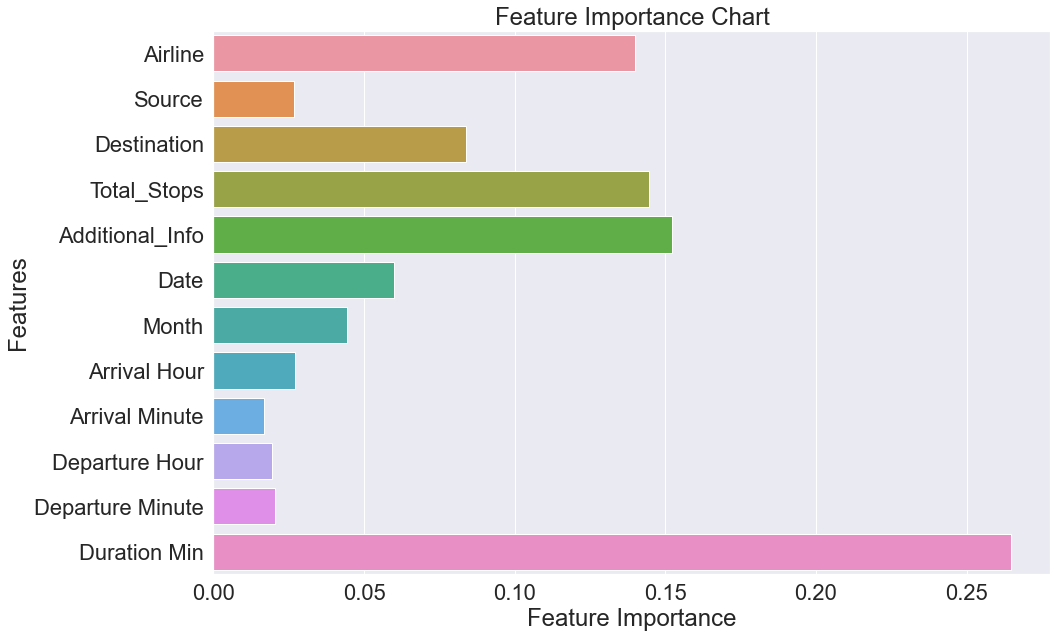

In [149]:
matplotlib.rcParams['figure.figsize']= (15, 10)
sns.barplot(x=model.feature_importances_, y=train_df.columns.to_list(), orient='h').set(title='Feature Importance Chart', xlabel='Feature Importance', ylabel='Features')

It can seen from the above graph that the **most important feature** in predicting the price of the flight ticket is **Duration Minutes** and **Arrival Minute is the least important**.

In [150]:
model_dict={
        'model':model,
        'scaler':scaler,
        'numerical columns':numerical_columns,
        'categorical columns':categorical_cols,
        'encoders':encoders
      }

joblib.dump(model_dict, 'flight price prediction model.joblib')

['flight price prediction model.joblib']

In [151]:
print(model_dict)

{'model': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None), 'scaler': MinMaxScaler(), 'numerical columns': ['Total_Stops', 'Date', 'Month', 'Arrival Hour', 'Arrival Minute', 'Departure Hour', 'Departure Minute', 'Duration Min'], 'categorical columns': ['Airline', 'Source', 'Destination', 'Additional_Info'], 'encoders': {'Airline': LabelEncoder(), 'Source': LabelEncoder(), 'Destination': LabelEncoder(), 'Additional_In

In [152]:
complete_model= joblib.load('flight price prediction model.joblib')
model=complete_model['model']
scaler=complete_model['scaler']
numerical_columns=complete_model['numerical columns']
categorical_columns=complete_model['categorical columns']

In [153]:
pred= model.predict(train_input)
print(pred)

[ 5068.9287  6236.7974  3848.8987 ... 13081.266   6427.503   6324.799 ]


Finding the Route Mean Squared Error(RMSE) of the prediction from the actual values. 

In [154]:
print(sqrt(mean_squared_error(train_target, pred)))

746.9674733741846


In [155]:
val_pred= model.predict(val_input)
print(val_pred)

[10003.935   4333.6147  7360.5913 ...  5798.9414 13922.405  17267.566 ]


In [156]:
print(sqrt(mean_squared_error(val_target, val_pred)))

1588.2552348189834


The prediction have an RMSE of **Rs. 1588.26**.

### Excluding the features with the least importance to see if that improves the accuracy score

In [157]:
model.get_booster().feature_names

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Date',
 'Month',
 'Arrival Hour',
 'Arrival Minute',
 'Departure Hour',
 'Departure Minute',
 'Duration Min']

In [158]:
model.fit(train_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour', 'Departure Minute'])], train_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [159]:
model.score(train_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour', 'Departure Minute'])], train_target)

0.9666644928764739

In [160]:
model.score(val_input[val_input.columns.difference(['Arrival Minute', 'Departure Hour', 'Departure Minute'])], val_target)

0.8544475424376755

In [161]:
model_1=XGBRegressor()

In [162]:
model_1.fit(train_input[train_input.columns.difference(['Arrival Minute'])], train_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [163]:
model_1.score(train_input[train_input.columns.difference(['Arrival Minute'])], train_target)

0.9715516288347865

In [164]:
model_1.score(val_input[train_input.columns.difference(['Arrival Minute'])], val_target)

0.8720529998703842

In [165]:
model_1.fit(train_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour'])], train_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [166]:
model_1.score(train_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour'])], train_target)

0.970102895373995

In [167]:
model_1.score(val_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour'])], val_target)

0.8735975623604166

Since the above models have scored less than the original model, it will be used for production moving forward.

# References

https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/tree/main/Flight%20Prediction
https://www.youtube.com/watch?v=v5dqavbyE-I&list=PLZoTAELRMXVPzj1D0i_6ajJ6gyD22b3jh&index=4